In [2]:
# set up program and define some useful functions
import matplotlib.pyplot as plt
import numpy as np
import sys,math

def rungeKutta4(f, r, t, h,E):
    """ Runge-Kutta 4 method """
    k1 = h*f(r,t,E)
    k2 = h*f(r+0.5*k1,t+0.5*h,E)
    k3 = h*f(r+0.5*k2,t+0.5*h,E)
    k4 = h*f(r+k3,t+h,E)
    return (k1 + 2*k2 + 2*k3 + k4)/6


def wavefunction(r,f,xpoints,h,E):
    # solve for the wavefunction as a function of x
    #  r - initial values
    #  f - wavefunction in terms of (psi,phi)
    #  xpoints - array of x values to evaluate over
    #  h - step size in x
    #  E - energy for Schrodinger's equation
    s = np.copy(r)   # make a copy of the initial values so that the function can be called repeatedly
    psipoints = []
    for x in xpoints:
        psipoints += [s[0]]
        s += rungeKutta4(f,s,x,h,E)
    return np.array(psipoints,float)

def f(r, x, E):
    """ Schrodinger's Equation """
    #m = 9.1094e-31         # Mass of electron
    #hbar = 1.0546e-34      # planck's constant hbar
    # calculate in natural units:  hbar**2/m = 1
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi =  2.0*(V(x)-E)*psi
    return np.array([fpsi,fphi], float)


In [11]:
# define a potential
# in this case, a square well potential
def Vinf(x):
    L = 1.0
    if np.abs(x)< L:
        return 0.0
    else:
        return 100   # gives E ~= n^2

# also V = |x|
def Vabs(x):
    return  np.abs(x)

Initial values Psi & Psi': [1. 0.]
Enter value for E: 1


/Users/sdobbs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


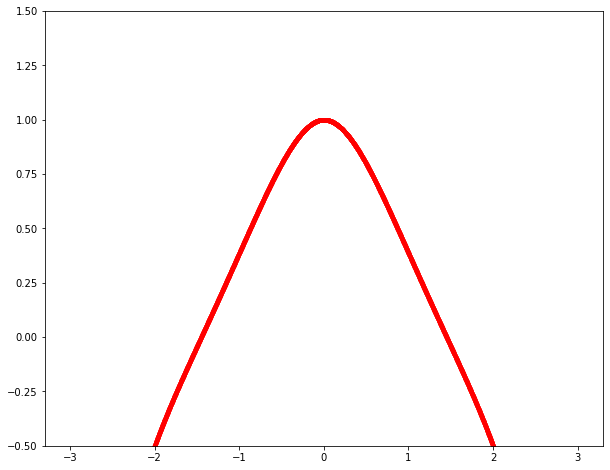

In [19]:
# WARNING: The code below only works for even functions (n=0,2,4,..)
# plot the wave function

# initalize values
V = Vabs 
max = 3
h = 0.001    # x step size

# set initial values for psi(x=0) & phi(x=0) for psi & phi
#
r = np.array([1,0],float) # even wavefunction
print("Initial values Psi & Psi':", r)

E1 = float(input("Enter value for E: "))

x = np.arange(0, max, h)  # first evaluate the function over x = 0 to max

psi1 = wavefunction(r,f,x,h,E1)

# extend wavefunction and range to negative values
psi1 = np.append(psi1[::-1],psi1[1:])
x = np.append(-x[::-1],[x[1:]])

#
# plot wavefunction 
fig = plt.figure(1, figsize=(10,8))
plt.plot(x,psi1,"r.")
plt.ylim(-0.5,1.5)     # need to put in something, in case the function explodes
fig.show()


In [26]:
# solve for the eigenvalue using the secant method

target = 1e-6

E1 = float(input("Enter value for E1: "))
E2 = float(input("Enter value for E2: "))

while np.abs(E1-E2)>target:
    # get the wavefunction for E1
    psipoints = wavefunction(r,f,x,h,E1)
    # get the wavefunction value at the boundary value
    psi1 = psipoints[-1] 

    # get the same for E2
    psipoints = wavefunction(r,f,x,h,E2)
    psi2 = psipoints[-1]
  
    #print("E1:",E1, "E2:",E2,"psi1:", psi1, "psi2:", psi2)
    E1, E2 = E2, E2 - psi2*(E2-E1)/(psi2-psi1) 
    
# we now have an eigenfunction and eigenvalue
print("Eigenenergy:", E2)

# set up examples
psi = psipoints
deltaX = h
E = E2

Enter value for E1: 0.4
Enter value for E2: 0.5
Eigenenergy: 0.8085599437513278


In [29]:
# other examples

# Normalize wavefunction 
print("<psi|psi>:", psi.dot(psi) * deltaX)
Norm = np.sqrt( psi.dot(psi) * deltaX )
print("Renormalizing by:", Norm)
psi = psi/Norm
print("<psi|psi>:",psi.dot(psi)*deltaX,"\n") 

# Calculate expectation value <x^2> 
print("<psi|x^2|psi>:", psi.dot( x*x*psi ) * deltaX,"\n")

#      Operator[p^2] = - d^2/dx^2  (hbar=1) 
#     <p^2> = int[ psi*(-d^2psi/dx^2)]
#
# Use the central difference for 2nd derivative
#      f''(x) = [ f(x+h) - 2f(x) + f(x-h)]/h**2  

ppPsi = np.zeros( len(psi) - 2 )
for i in range( len(ppPsi) ) :
    ppPsi[i] +=  -(psi[i+2] -2.0*psi[i+1] + psi[i])/deltaX**2

# trim arrays to match the size of ppPsi
psi = psi[1:-1] 
x = x[1:-1]
print("<psi|p^2|psi>:", psi.dot(ppPsi) * deltaX )

# using Schrodinger's Equation p**2 * Psi = -d^2Psi/dX^2 = 2 *(E - V(x))*psi
for i in range( len(x) ):
    ppPsi[i] = 2.0*(E - V(x[i])) * psi[i]
p_squared = psi.dot(ppPsi) * deltaX
print("<psi|p^2|psi>:", p_squared )

<psi|psi>: 0.99999900524406
Renormalizing by: 0.9999995026219063
<psi|psi>: 1.0000000000000002 

<psi|x^2|psi>: 0.47289479550418384 

<psi|p^2|psi>: 0.5384878362738139
<psi|p^2|psi>: 0.5384889419069524
